In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import copy
from skimage.metrics import structural_similarity, mean_squared_error

In [2]:
def diff_image(img1, img2):
    (ssim, diff) = structural_similarity(img1, img2, full = True)
    diff = (diff * 255).astype("uint8")
    print("SSIM: {}".format(ssim))

    mse = mean_squared_error(img1, img2)
    print("MSE: {}".format(mse))

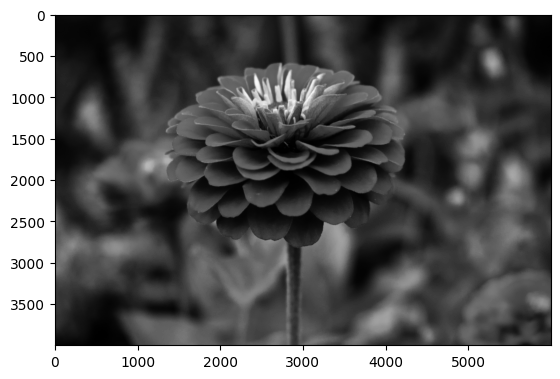

In [3]:
image = cv2.imread("img.jpg")
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image_gray, cmap="gray")

Создание шума Гуауса

In [4]:
def create_gaussian_noise(image_gray):
    mean = 0
    stddev = 100
    noise_gauss = np.zeros(image_gray.shape, np.uint8)
    cv2.randn(noise_gauss, mean, stddev)
    return noise_gauss

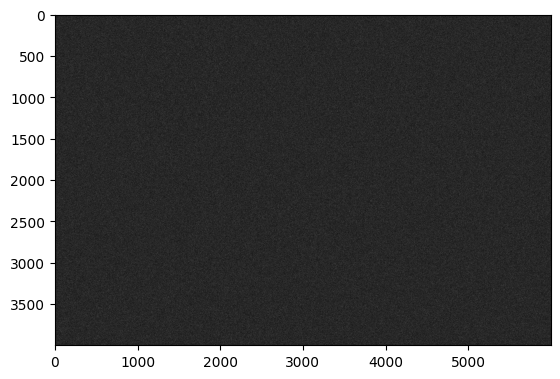

In [5]:
gaussian_noise = create_gaussian_noise(image_gray)
plt.imshow(gaussian_noise, cmap="gray")

Наложение шума Гауса

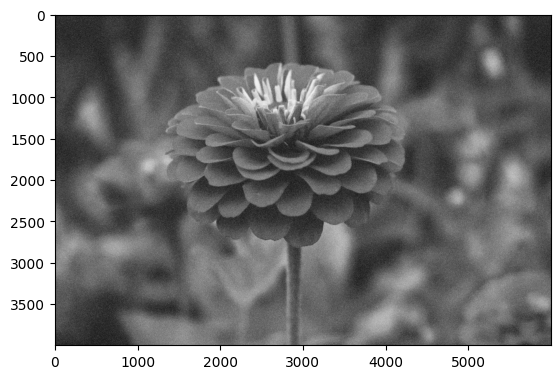

In [6]:
image_gaussian_noise = cv2.add(image_gray, gaussian_noise)
plt.imshow(image_gaussian_noise, cmap="gray")

In [7]:
diff_image(image_gray, image_gaussian_noise)

SSIM: 0.025890101157439064
MSE: 4498.495616958333


Создание нормального шума 

In [8]:
def add_uniform_noise(image, low=-50, high=50):
    noise_uniform = np.random.uniform(low, high, image.shape).astype(np.uint8)
    noisy_image = np.clip(image.astype(np.int16) + noise_uniform, 0, 255).astype(np.uint8)
    return noisy_image

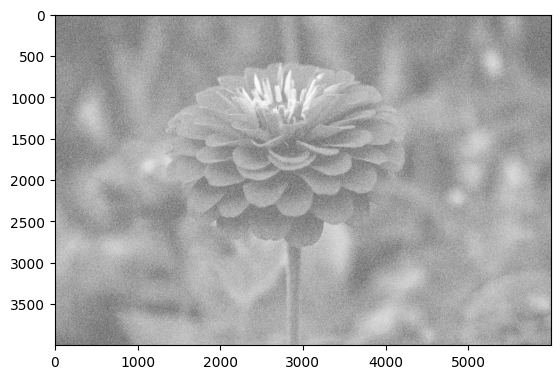

In [9]:
image_norm = add_uniform_noise(image_gray, low=-50, high=50)
plt.imshow(image_norm, cmap="gray")

In [10]:
diff_image(image_gray, image_norm)

SSIM: 0.008200880764685666
MSE: 19759.579028166667


Тесты фильтров на Гаусовом шуме

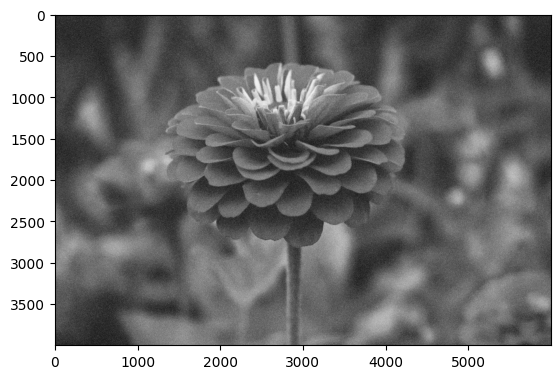

In [11]:
image_gaussian_noise_median = cv2.medianBlur(image_gaussian_noise, 3)
plt.imshow(image_gaussian_noise, cmap="gray")

In [12]:
diff_image(image_gray, image_gaussian_noise_median)

SSIM: 0.15361941488749958
MSE: 844.0684315833333


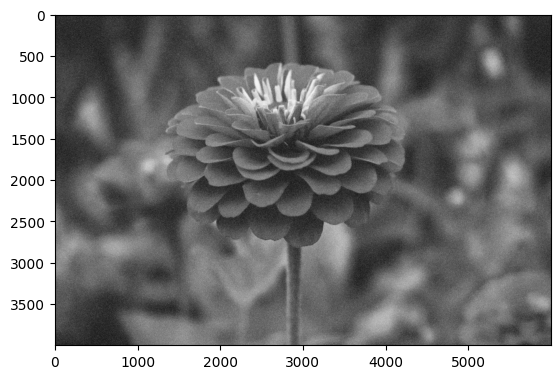

In [13]:
image_gaussian_noise_gauss = cv2.GaussianBlur(image_gaussian_noise,(5,5),0)
plt.imshow(image_gaussian_noise_gauss, cmap="gray")

In [14]:
diff_image(image_gray, image_gaussian_noise_gauss)

SSIM: 0.2304045520784349
MSE: 1729.2054128333334


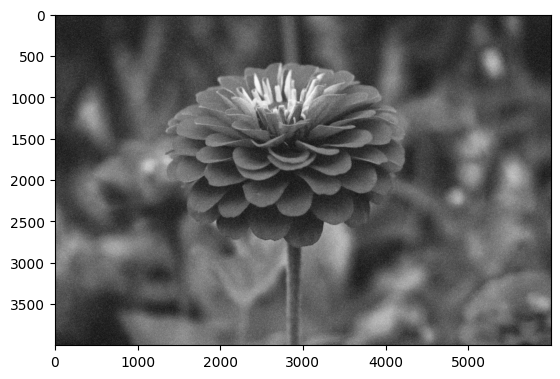

In [15]:
image_gauss_bilat = cv2.bilateralFilter(image_gaussian_noise,9,75,75)
plt.imshow(image_gauss_bilat, cmap="gray")

In [16]:
diff_image(image_gray, image_gauss_bilat)

SSIM: 0.10450695775045171
MSE: 1786.3902955


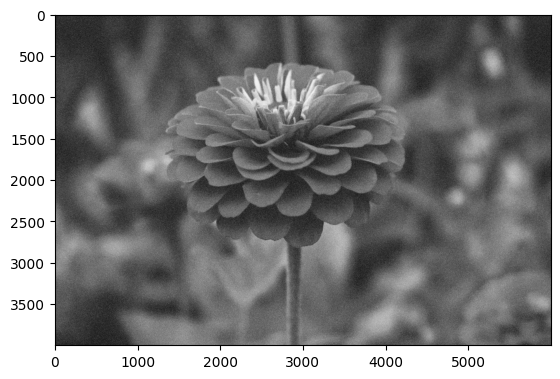

In [35]:
image_gauss_nlm_1 = cv2.fastNlMeansDenoising(image_gaussian_noise, h = 10)
plt.imshow(image_gauss_nlm_1, cmap="gray")

In [36]:
diff_image(image_gray, image_gauss_nlm_1)

SSIM: 0.026085143665934264
MSE: 4498.358609625


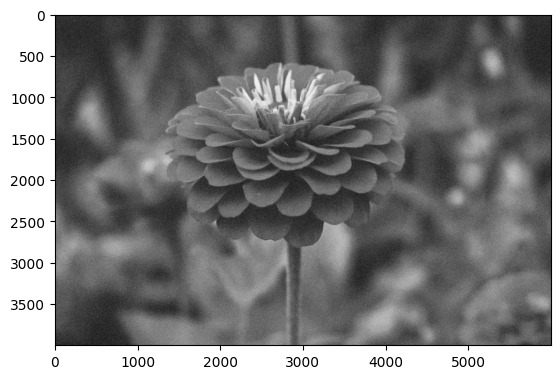

In [19]:
image_gauss_nlm_2 = cv2.fastNlMeansDenoising(image_gaussian_noise, h = 20)
plt.imshow(image_gauss_nlm_2, cmap="gray")

In [20]:
diff_image(image_gray, image_gauss_nlm_2)

SSIM: 0.02893100217642121
MSE: 4486.269640875


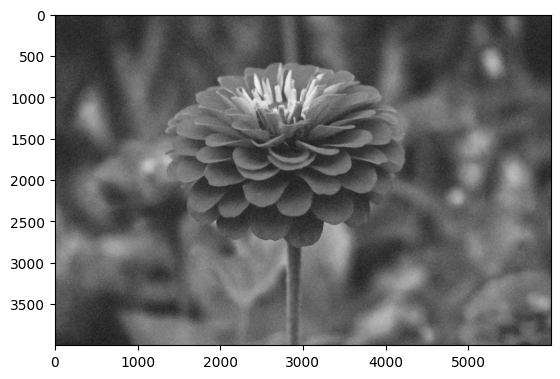

In [21]:
image_gauss_nlm_3 = cv2.fastNlMeansDenoising(image_gaussian_noise, h = 30)
plt.imshow(image_gauss_nlm_3, cmap="gray")

In [22]:
diff_image(image_gray, image_gauss_nlm_3)

SSIM: 0.0833390685587876
MSE: 2778.293724375


Тесты фильтров на нормальном шуме

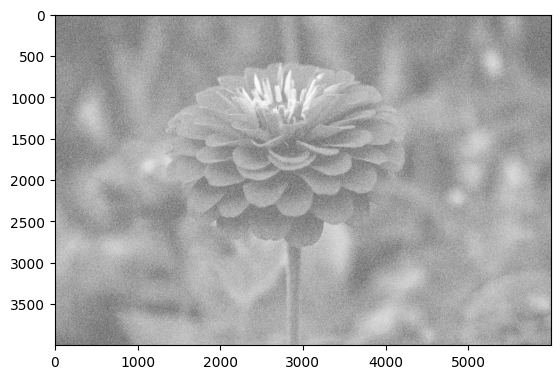

In [37]:
image_norm_median = cv2.medianBlur(image_norm, 3)
plt.imshow(image_norm, cmap="gray")

In [38]:
diff_image(image_gray, image_norm_median)

SSIM: 0.010505814595723868
MSE: 18974.171139125


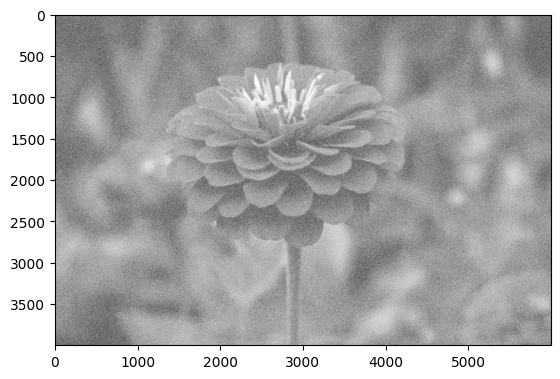

In [25]:
image_norm_gauss = cv2.GaussianBlur(image_norm,(5,5),0)
plt.imshow(image_norm_gauss, cmap="gray")

In [26]:
diff_image(image_gray, image_norm_gauss)

SSIM: 0.08891090264265004
MSE: 12573.074934916667


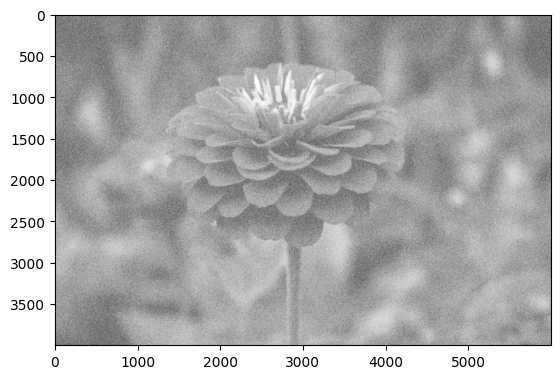

In [27]:
image_norm_bilat = cv2.bilateralFilter(image_norm,9,75,75)
plt.imshow(image_norm_bilat, cmap="gray")

In [28]:
diff_image(image_gray, image_norm_bilat)

SSIM: 0.01839081702668429
MSE: 17914.502961125


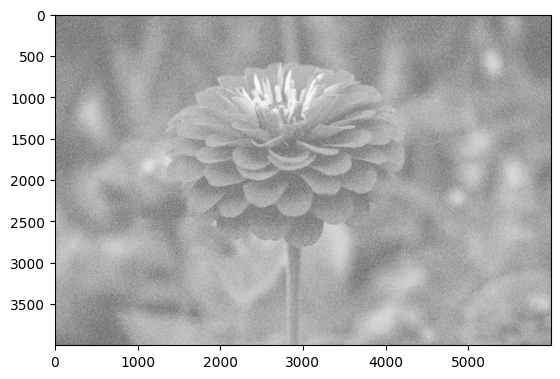

In [29]:
image_norm_nlm_1 = cv2.fastNlMeansDenoising(image_norm, h = 10)
plt.imshow(image_norm_nlm_1, cmap="gray")

In [30]:
diff_image(image_gray, image_norm_nlm_1)

SSIM: 0.008988972163226779
MSE: 19759.303808916666


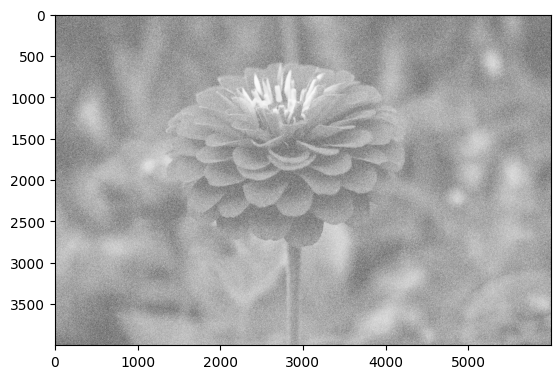

In [31]:
image_norm_nlm_2 = cv2.fastNlMeansDenoising(image_norm, h = 20)
plt.imshow(image_norm_nlm_2, cmap="gray")

In [32]:
diff_image(image_gray, image_norm_nlm_2)

SSIM: 0.011462517513817662
MSE: 19755.975596291668


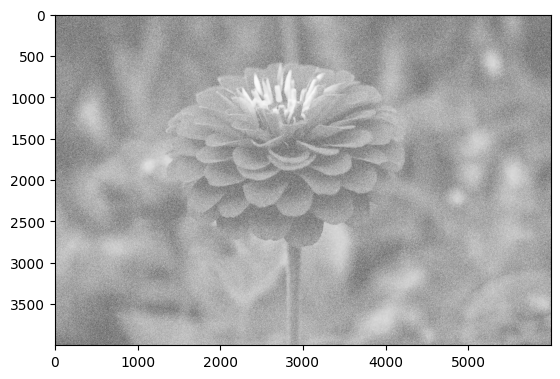

In [33]:
image_norm_nlm_3 = cv2.fastNlMeansDenoising(image_norm, h = 30)
plt.imshow(image_norm_nlm_3, cmap="gray")

In [34]:
diff_image(image_gray, image_norm_nlm_3)

SSIM: 0.016089453172648274
MSE: 19688.868546958332


# Выводы
## Гаусовский шум
1. медианный фильтр
2. фильтр гауса
3. билатериальный
4. фильтр средних (с максильным значением)
## Нормальный шум
1. фильтр гауса
2. медианный фильтр
3. билатериальный
4. фильтр средних (с максильным значением)